In [87]:
import pandas as pd
import scipy.optimize as opt

Df = pd.read_csv("../../membershipchainservice/Data/messages.txt")
Df_storage = pd.read_csv("../../membershipchainservice/Data/storage.txt")
Df_storage

,Name,Function,storage,epoch
0,node_2,Pings,344,1
1,node_5,Pings,344,1
2,node_0,Pings,344,1
3,node_4,Pings,344,1
4,node_3,Pings,344,1
...,...,...,...,...
157,node_3,Pings,7448,9
158,node_19,Pings,7448,9
159,node_29,Pings,7448,9
160,node_15,Pings,7448,9


In [88]:
Df["nb Nodes"] = Df["epoch"].apply(lambda epoch : len(Df[Df["epoch"]==epoch]["Name"].unique()))
Df_storage["nb Nodes"] = Df_storage["epoch"].apply(lambda epoch : len(Df[Df["epoch"]==epoch]["Name"].unique()))

[  2.70733333 -57.61800079]


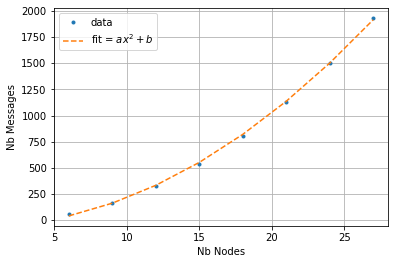

In [94]:
def func_x2(x, a, b):
     return a * x**2 + b
    
import matplotlib.pyplot as plt
import numpy as np

sums = Df.groupby("nb Nodes").sum()
X = np.array(list(sums.index)[:-1])
Y = np.array(list(sums["nb_messages"])[:-1])
plt.plot(X,Y, ".")
plt.grid(True)
plt.ylabel("Nb Messages")
plt.xlabel("Nb Nodes")

optimizedParameters, cov = opt.curve_fit(func_x2, X, Y);

print(optimizedParameters)
plt.plot(X, func_x2(X, *optimizedParameters), "--")
#plt.loglog(X, func_x2(X, *optimizedParameters), "--")

plt.legend(["data", "fit = $ax^2 + b$"])

plt.savefig("../../latex/thesis_template/figures/messages-plot.pdf")

,Name,Function,storage,epoch,nb Nodes
2,node_0,Pings,344,1,9
8,node_0,Pings,728,2,12
16,node_0,Pings,1256,3,15
39,node_0,Pings,1928,4,18
44,node_0,Pings,2744,5,21
79,node_0,Pings,3704,6,24
96,node_0,Pings,4808,7,27
107,node_0,Pings,6056,8,30
145,node_0,Pings,7448,9,30


[   6.99807321 -295.67629817]


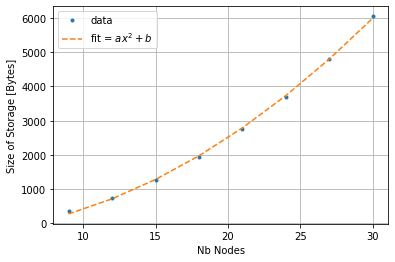

In [93]:
import matplotlib.pyplot as plt

data = Df_storage[Df_storage["Name"]=="node_0"]
display(data)
plt.plot(data["nb Nodes"][:-1],data["storage"][:-1], ".")

plt.grid(True)
plt.ylabel("Size of Storage [Bytes]")
plt.xlabel("Nb Nodes")

optimizedParameters, cov = opt.curve_fit(func_x2, data["nb Nodes"][:-1], data["storage"][:-1]);

print(optimizedParameters)
plt.plot(data["nb Nodes"], func_x2(data["nb Nodes"], *optimizedParameters), "--")
#plt.loglog(X, func_x2(X, *optimizedParameters), "--")

plt.legend(["data", "fit = $ax^2 + b$"])

plt.savefig("../../latex/thesis_template/figures/storage-plot.pdf")

In [62]:
data

,Name,Function,storage,epoch,nb Nodes
3,node_0,Pings,264,1,4
9,node_0,Pings,392,2,6
12,node_0,Pings,520,3,8
25,node_0,Pings,648,4,10
30,node_0,Pings,792,5,12
43,node_0,Pings,936,6,14
64,node_0,Pings,1080,7,16
87,node_0,Pings,1224,8,18
105,node_0,Pings,1368,9,20
